Dữ liệu được cung cấp trong file penguins-data.csv được khảo sát các số đo của 3 loài chim cánh cụt trên 3 đảo (Biscoe, Dream, Torgersen). Yêu cầu
1.(1 điểm) Đọc dữ liệu và hiển thị 10 dòng dữ liệu đầu tiên

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1.(1 điểm) Đọc dữ liệu và hiển thị 10 dòng dữ liệu đầu tiên

In [2]:
dt_penguins = pd.read_csv('penguins-data.csv')

In [3]:
dt_penguins.head(10)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
5,6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
6,7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
7,12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
8,13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
9,14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


In [11]:
dt_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 20.9+ KB


In [12]:
dt_penguins.describe()

,Unnamed: 0,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,172.303303,43.992793,17.164865,200.966967,4207.057057
std,97.346548,5.468668,1.969235,14.015765,805.215802
min,0.000000,32.100000,13.100000,172.000000,2700.000000
25%,89.000000,39.500000,15.600000,190.000000,3550.000000
50%,172.000000,44.500000,17.300000,197.000000,4050.000000
75%,256.000000,48.600000,18.700000,213.000000,4775.000000
max,343.000000,59.600000,21.500000,231.000000,6300.000000


2.(5 điểm) Tìm hiểu thông tin về dữ liệu:

a.Số lượng chim cánh cụt của mỗi loài. 

In [4]:
dt_penguins['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

b.Số lượng mỗi loài chim cánh cụt trên mỗi đảo

In [5]:
# print(dt_penguins['island'].value_counts())
dt_penguins.groupby(['species','island']).size()


species    island   
Adelie     Biscoe        44
           Dream         55
           Torgersen     47
Chinstrap  Dream         68
Gentoo     Biscoe       119
dtype: int64

c. Với mỗi loại chim cánh cụt, bạn hãy so sánh các đại lượng thống kê: giá trị trung bình, trung vị, độ lệch chuẩn trên các thuộc tính độ dài mỏ (bill_leghth_mm), độ sâu mỏ (bill_depth_mm), độ dài cánh (flipper) và trọng lượng (body_mass).

In [7]:
# tính trung bình
dt_penguins[['species','island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].groupby(['species','island']).mean()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   island                                                        
Adelie    Biscoe          38.975000      18.370455         188.795455   
          Dream           38.520000      18.240000         189.927273   
          Torgersen       39.038298      18.451064         191.531915   
Chinstrap Dream           48.833824      18.420588         195.823529   
Gentoo    Biscoe          47.568067      14.996639         217.235294   

                     body_mass_g  
species   island                  
Adelie    Biscoe     3709.659091  
          Dream      3701.363636  
          Torgersen  3708.510638  
Chinstrap Dream      3733.088235  
Gentoo    Biscoe     5092.436975

Nhận xét: Theo số liệu thống kê, thấy được tỉ lệ trung bình theo độ dài mỏ của mỗi loại chim trên các đảo như Loại Adelie so với chinstrap và Gentoo chênh lệch khoảng 10.00, theo độ sâu mỏ thì không có sự chênh lệch nhiều chỉ có chênh lệch với loại Gentoo khoảng 4.00, theo dài cánh thì tỉ lệ phân bố có sự đồng đều với chênh lệch không đang kể trên mỗi đảo, Cuối cùng là theo trọng lượng thì có sự chênh lệch khác cao của loại Gentoo so với các loại khác trên 10.00

In [33]:
# tính trung vị
dt_penguins[['species','island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].groupby(['species','island']).median()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   island                                                        
Adelie    Biscoe              38.70          18.45              189.5   
          Dream               38.80          18.40              190.0   
          Torgersen           39.00          18.40              191.0   
Chinstrap Dream               49.55          18.45              196.0   
Gentoo    Biscoe              47.40          15.00              216.0   

                     body_mass_g  
species   island                  
Adelie    Biscoe          3750.0  
          Dream           3600.0  
          Torgersen       3700.0  
Chinstrap Dream           3700.0  
Gentoo    Biscoe          5050.0

Nhận xét: Theo số liệu thống kê, thấy được tỉ lệ trung vị theo độ dài mỏ của mỗi loại chim trên các đảo như Loại Adelie so với chinstrap và Gentoo chênh lệch khoảng 10.00, theo độ sâu mỏ thì không có sự chênh lệch nhiều chỉ có chênh lệch với loại Gentoo khoảng 3.5, theo dài cánh thì tỉ lệ phân bố có sự đồng đều với chênh lệch không đang kể trên mỗi đảo, Cuối cùng là theo trọng lượng thì có sự chênh lệch khác cao của loại Gentoo so với các loại khác trên 10.00

In [34]:
# tính độ lệch chuẩn
dt_penguins[['species','island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].groupby(['species','island']).std()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   island                                                        
Adelie    Biscoe           2.480916       1.188820           6.729247   
          Dream            2.484276       1.140598           6.480325   
          Torgersen        3.028097       1.346472           6.220062   
Chinstrap Dream            3.339256       1.135395           7.131894   
Gentoo    Biscoe           3.106116       0.985998           6.585431   

                     body_mass_g  
species   island                  
Adelie    Biscoe      487.733722  
          Dream       448.774519  
          Torgersen   451.846351  
Chinstrap Dream       384.335081  
Gentoo    Biscoe      501.476154

Nhận xét: Nhìn vào thống kê ta cũng thấy được sự chênh lệch giữa các loại chim trên mỗi đảo được thống kê theo độ dài mỏ, độ sâu mỏ, độ dài cánh và trọng lượng được tính độ lệch chuẩn thì không có sự chênh lệch quá nhiều giữa mỗi loại

d.Dựa trên kết quả tính được, bạn có rút ra được nhận xét gì không?


3.(2 điểm) Vẽ đồ thị phù hợp thể hiện phân phối của ba loại chim cánh cụt, qua đó bạn hãy đưa ra bình luận của mình.

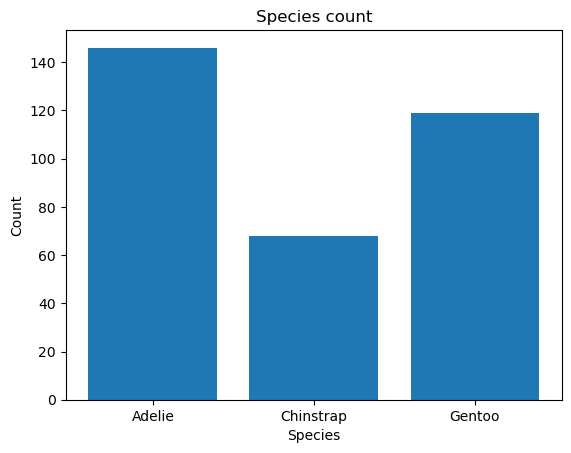

In [21]:
species = dt_penguins.groupby(['species']).size().index.tolist()
plt.bar(species, dt_penguins.groupby(['species']).size().tolist())
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species count')
plt.show()

4.(2 điểm) Chọn loại đồ thị phù hợp để khảo sát mối quan hệ giữa độ dài cánh và trọng lượng của loài chim cánh cụt Gentoo:

a.Theo bạn hai đại lượng này có quan hệ với nhau hay không? Giải thích.

b.Ngoài độ dài cánh, theo bạn còn thuộc tính nào có khả năng ảnh hưởng đến trọng lượng của loài chim Gentoo?

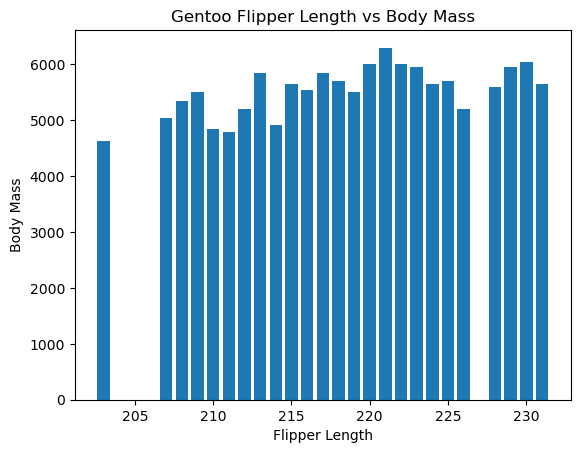

In [28]:
#  Chọn loại đồ thị phù hợp để khảo sát mối quan hệ giữa độ dài cánh và trọng lượng của loài chim cánh cụt Gentoo:
Gentoo_Flipper_Length = dt_penguins[dt_penguins['species'] == 'Gentoo']['flipper_length_mm']
Gentoo_body_mass = dt_penguins[dt_penguins['species'] == 'Gentoo']['body_mass_g']

plt.bar(Gentoo_Flipper_Length, Gentoo_body_mass)
plt.xlabel('Flipper Length')
plt.ylabel('Body Mass')
plt.title('Gentoo Flipper Length vs Body Mass')
plt.show()



Theo bạn hai đại lượng này có quan hệ với nhau hay không? Giải thích

Có, hai đại lượng này có mối quan hệ tuyến tính với nhau,
khi độ dài cánh tăng thì trọng lượng cơ thể cũng tăng theo.

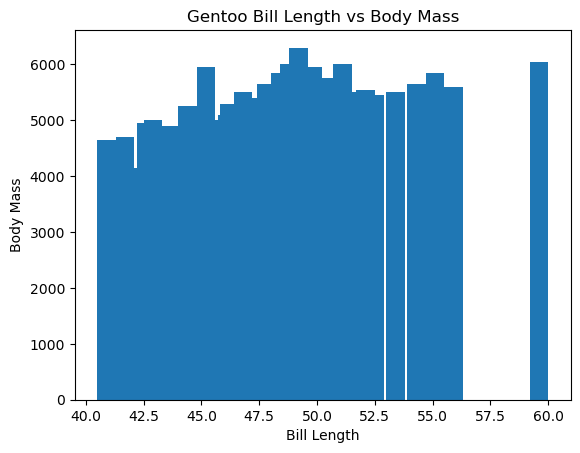

In [26]:
# b.Ngoài độ dài cánh, theo bạn còn thuộc tính nào có khả năng ảnh hưởng đến trọng lượng của loài chim Gentoo?

Gentoo_bill_length = dt_penguins[dt_penguins['species'] == 'Gentoo']['bill_length_mm']
Gentoo_body_mass = dt_penguins[dt_penguins['species'] == 'Gentoo']['body_mass_g']

plt.bar(Gentoo_bill_length, Gentoo_body_mass)
plt.xlabel('Bill Length')
plt.ylabel('Body Mass')
plt.title('Gentoo Bill Length vs Body Mass')
plt.show()
